In [11]:
import pymc as pm

lambda_ = pm.Exponential("poisson_parram", 1)

data_generater = pm.Poisson("data_generater", lambda_)
data_plus_one = data_generater + 1

print("Children of lambda_: ")
print(lambda_.children, "\n")

print("Parents of data_generater: ")
print(data_generater.parents, "\n")

print("Children of data_generater: ")
print(data_generater.children, "\n")

Children of lambda_: 
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_generater' at 0x10a92ac50>} 

Parents of data_generater: 
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_parram' at 0x10a92abe0>} 

Children of data_generater: 
{<pymc.PyMCObjects.Deterministic '(data_generater_add_1)' at 0x10a92acf8>} 



In [12]:
print("lambda_.value = ", lambda_.value)
print("data_generater.value = ", data_generater.value)
print("data_plus_one.value = ", data_plus_one.value)

lambda_.value =  0.47331786053969727
data_generater.value =  0
data_plus_one.value =  1


In [17]:
lambda_1 = pm.Exponential("lambda_1", 1)
lambda_2 = pm.Exponential("lambda_2", 1)
tau = pm.DiscreteUniform("tau", lower=0, upper=10)

print("Initialized values...")
print("lambda_1.value = ", lambda_1.value)
print("lambda_2.value = ", lambda_2.value)
print("tau.value = ", tau.value)

lambda_1.random()
lambda_2.random()
tau.random()

print()
print("After calling random() on the variables...")
print("lambda_1.value = ", lambda_1.value)
print("lambda_2.value = ", lambda_2.value)
print("tau.value = ", tau.value)

type(lambda_1 + lambda_2)

Initialized values...
lambda_1.value =  0.06945839826100902
lambda_2.value =  0.18577687512080296
tau.value =  6

After calling random() on the variables...
lambda_1.value =  0.9936315185194956
lambda_2.value =  0.6179034551132322
tau.value =  6


pymc.PyMCObjects.Deterministic

(0, 8)

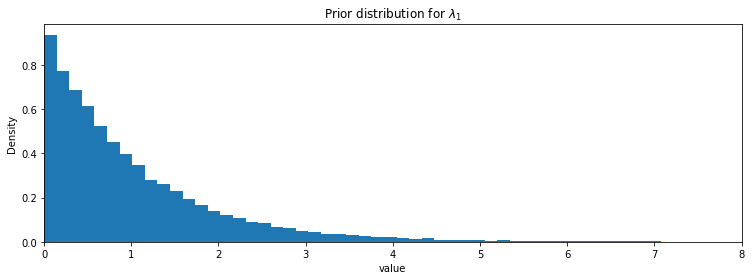

In [19]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlabel("value")
plt.ylabel("Density")
plt.xlim(0, 8)

In [23]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fxd", 1, value=data, observed=True)
print("value: ", fixed_variable.value)
print("calling .random()")

fixed_variable.random() # make sure if the fixed_variable is really fixed or not 
print("value: ", fixed_variable.value)

value:  [10  5]
calling .random()
value:  [10  5]


In [24]:
data = np.array([10, 25, 15, 20, 35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print(obs.value)

[10 25 15 20 35]


In [25]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2, tau])

In [26]:
tau = pm.rdiscrete_uniform(0, 80)
print(tau)

45


In [28]:
alpha = 1./20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)
print(lambda_1, lambda_2)

lambda_ = np.r_[lambda_1*np.ones(tau), lambda_2*np.ones(80-tau)]
print(lambda_)

14.5214234477 28.421726088
[ 14.52142345  14.52142345  14.52142345  14.52142345  14.52142345
  14.52142345  14.52142345  14.52142345  14.52142345  14.52142345
  14.52142345  14.52142345  14.52142345  14.52142345  14.52142345
  14.52142345  14.52142345  14.52142345  14.52142345  14.52142345
  14.52142345  14.52142345  14.52142345  14.52142345  14.52142345
  14.52142345  14.52142345  14.52142345  14.52142345  14.52142345
  14.52142345  14.52142345  14.52142345  14.52142345  14.52142345
  14.52142345  14.52142345  14.52142345  14.52142345  14.52142345
  14.52142345  14.52142345  14.52142345  14.52142345  14.52142345
  28.42172609  28.42172609  28.42172609  28.42172609  28.42172609
  28.42172609  28.42172609  28.42172609  28.42172609  28.42172609
  28.42172609  28.42172609  28.42172609  28.42172609  28.42172609
  28.42172609  28.42172609  28.42172609  28.42172609  28.42172609
  28.42172609  28.42172609  28.42172609  28.42172609  28.42172609
  28.42172609  28.42172609  28.42172609  28.42172

In [29]:
data = pm.rpoisson(lambda_)
print(data)

[12 20  7 13 10 13 14 16 16 11 11 13 15 17 17 14 17 14 22 20 18 14 11 17 11
 11 10 14 21 14 17 10 16 10 14 13 17 17 14 17 18 14 17 13 10 31 13 31 29 27
 30 35 25 17 29 43 24 32 28 22 31 22 31 46 27 27 30 29 25 25 24 25 26 30 20
 28 30 35 27 28]


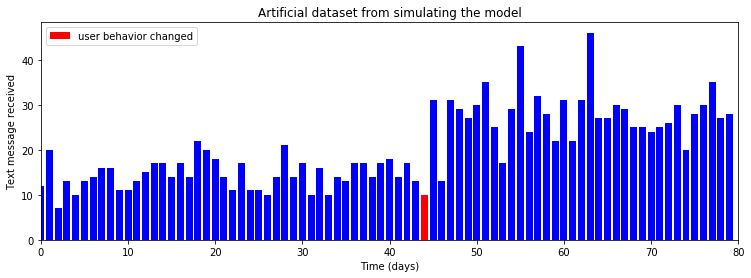

In [30]:
plt.bar(np.arange(80), data, color="b")
plt.bar(tau-1, data[tau-1], color="r", label="user behavior changed")

plt.xlabel("Time (days)")
plt.ylabel("Text message received")
plt.title("Artificial dataset from simulating the model")
plt.xlim(0, 80)
plt.legend()

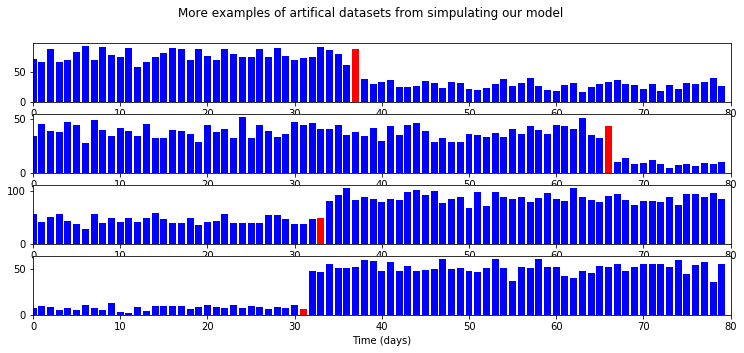

In [37]:
def plot_artifical_sms_dataset():
    tau = pm.rdiscrete_uniform(0, 80)
    alpha = 1. / 20.
    lambda_1, lambda_2 = pm.rexponential(alpha, 2)
    data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2, 80-tau)]
    plt.bar(np.arange(80), data, color="b")
    plt.bar(tau-1, data[tau-1], color="r", label="user behavior changed")
    plt.xlim(0, 80)
    
    
figsize(12.5, 5)
plt.suptitle("More examples of artifical datasets from simpulating our model")

for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.xlabel("Time (days)")
    plot_artifical_sms_dataset()